# Part 3: Random Forest

### Objective

**Fit Model:** We will forecast the price of municipal green bonds on the "covid", "post_covid", and "full" dataset using *Random Forest*. To select the hyperparameters for our model, we will do time series cross validation on the training set. When doing this time series cross validation, we will when possible test the default hyperparameters against new hyperparameters. Sometimes, documentation on the tree model is not complete, and the exact default hyperparameter is not confidently known. Notice that we use a fixed seed when testing our hyperparameters and fitting our model. 

**Evaluate Forecast:** Once we have trained our model on the 80% of training data, we will test it against the 20% of testing data. We will plot the results of our forecasts for the "covid", "post covid", and "full" data sets. We will display the mean squared error (MSE), $r^2$, root mean squared error (RMSE), mean absolute error (MAE), and mean absolute percentage error (MAPE) of our forecats. 

**Explain Forecast:** Finally, we will use the "shap" package in python to plot various SHAP graphs, which will give us an explanation behind the drivers of our forecasted values over the testing set. 


In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import shap
import my_functions
shap.initjs()

## Default Parameters

- n_estimators: 100  
- learning_rate: Random Forest does not using learning rate parameter because it does not use gradient boosting  
- max_depth: none. By default, there is no max depth, meaning the trees can grow as large as they need to achieve pure leaves  

## Import Data

In [2]:
# import all data
df_covid = pd.read_excel("./cleaned_excel_data/covid_data.xlsx")
df_post_covid = pd.read_excel("./cleaned_excel_data/post_covid_data.xlsx")
df_full = pd.read_excel("./cleaned_excel_data/full_data.xlsx")

In [3]:
# covid data
X_covid = df_covid.drop(columns=['date', 'mgb_log_diff'])
y_covid = df_covid['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_covid))
X_train_covid, X_test_covid = X_covid[:split_idx], X_covid[split_idx:]
y_train_covid, y_test_covid = y_covid[:split_idx], y_covid[split_idx:]


# post covid data
X_post_covid = df_post_covid.drop(columns=['date', 'mgb_log_diff'])
y_post_covid = df_post_covid['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_post_covid))
X_train_post_covid, X_test_post_covid = X_post_covid[:split_idx], X_post_covid[split_idx:]
y_train_post_covid, y_test_post_covid = y_post_covid[:split_idx], y_post_covid[split_idx:]

# full data
X_full = df_full.drop(columns=['date', 'mgb_log_diff'])
y_full = df_full['mgb_log_diff']
# train test split
split_idx = int(0.8 * len(df_full))
X_train_full, X_test_full = X_full[:split_idx], X_full[split_idx:]
y_train_full, y_test_full = y_full[:split_idx], y_full[split_idx:]

## Find Optimal Parameters (Time Series Cross Validation)

Since I've tuned these models before, I have a good idea of parameters close to the optimal selection. 

In [4]:
param_grid = {
    'max_depth': [6,8,10, None],
    'n_estimators' : [75, 100, 125],
    'random_state': [1] # for reproducibility
}

#### Covid Time Period

In [5]:
best_params_covid, best_mse_covid = my_functions.time_series_cv_tuning_rf(X_train_covid, y_train_covid, param_grid, print_results = False)


Testing parameters: {'max_depth': 6, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 245.2742

Testing parameters: {'max_depth': 6, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 235.7251

Testing parameters: {'max_depth': 6, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 250.4053

Testing parameters: {'max_depth': 8, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 231.0938

Testing parameters: {'max_depth': 8, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 226.8369

Testing parameters: {'max_depth': 8, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 242.9730

Testing parameters: {'max_depth': 10, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 259.8444

Testing parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 253.7929

Testing parameters: {'max_depth': 10, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 268.1747

Testing parameters: {'max_depth': None, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 258.3467

Testing parameters: {'max_depth': Non

#### Post Covid Time Period

In [6]:
best_params_post_covid, best_mse_post_covid = my_functions.time_series_cv_tuning_rf(X_train_post_covid, y_train_post_covid, param_grid, print_results = False)


Testing parameters: {'max_depth': 6, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 30.0771

Testing parameters: {'max_depth': 6, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 29.3632

Testing parameters: {'max_depth': 6, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 29.3150

Testing parameters: {'max_depth': 8, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 29.6848

Testing parameters: {'max_depth': 8, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 29.0513

Testing parameters: {'max_depth': 8, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 29.0037

Testing parameters: {'max_depth': 10, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 29.5365

Testing parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 29.0116

Testing parameters: {'max_depth': 10, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 28.9778

Testing parameters: {'max_depth': None, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 29.4468

Testing parameters: {'max_depth': None, 'n_esti

#### Full Time Period

In [7]:
best_params_full, best_mse_full = my_functions.time_series_cv_tuning_rf(X_train_full, y_train_full, param_grid, print_results = False)


Testing parameters: {'max_depth': 6, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 180.7028

Testing parameters: {'max_depth': 6, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 175.7962

Testing parameters: {'max_depth': 6, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 191.3081

Testing parameters: {'max_depth': 8, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 171.1209

Testing parameters: {'max_depth': 8, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 170.9976

Testing parameters: {'max_depth': 8, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 186.1693

Testing parameters: {'max_depth': 10, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 192.6882

Testing parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 1}
Avg MSE: 182.4021

Testing parameters: {'max_depth': 10, 'n_estimators': 125, 'random_state': 1}
Avg MSE: 194.2954

Testing parameters: {'max_depth': None, 'n_estimators': 75, 'random_state': 1}
Avg MSE: 179.8244

Testing parameters: {'max_depth': Non

## See Quality of Prediction 

We will use the optimal parameters to train the model

#### Covid Time Period

In [8]:
model_rf_covid = RandomForestRegressor(criterion='squared_error', verbose=0, **best_params_covid)
model_rf_covid.fit(X_train_covid, y_train_covid)

RandomForestRegressor(max_depth=8, random_state=1)

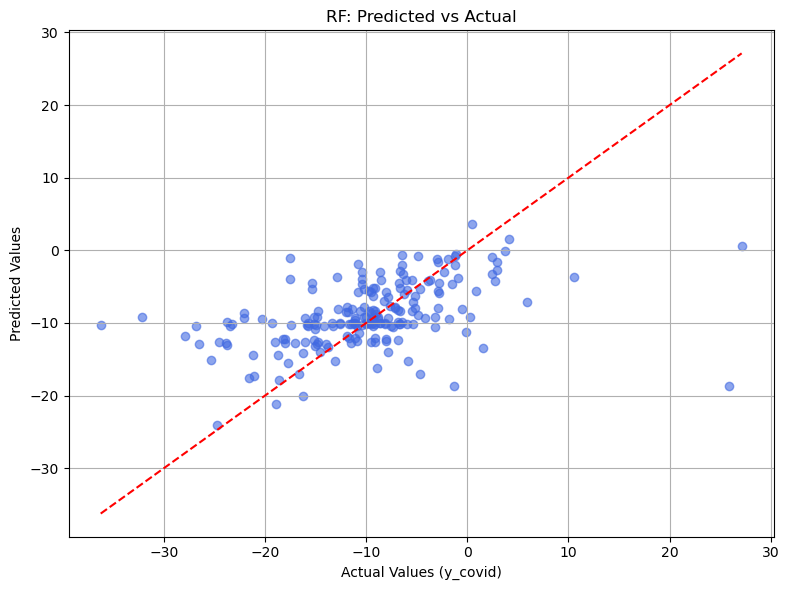

MSE of RF: 52.2143
R squared of RF: 0.1908
RMSE of RF: 7.2259
MAE of RF: 4.7556
MAPE of RF: 1.38%


In [9]:
metrics = my_functions.evaluate_model_performance(model_rf_covid, X_test_covid, y_test_covid, 
                                   model_name="RF", target_name="y_covid")

#### Post Covid Time Period

In [10]:
model_rf_post_covid = RandomForestRegressor(criterion='squared_error', verbose=0,  **best_params_post_covid)
model_rf_post_covid.fit(X_train_post_covid, y_train_post_covid)

RandomForestRegressor(random_state=1)

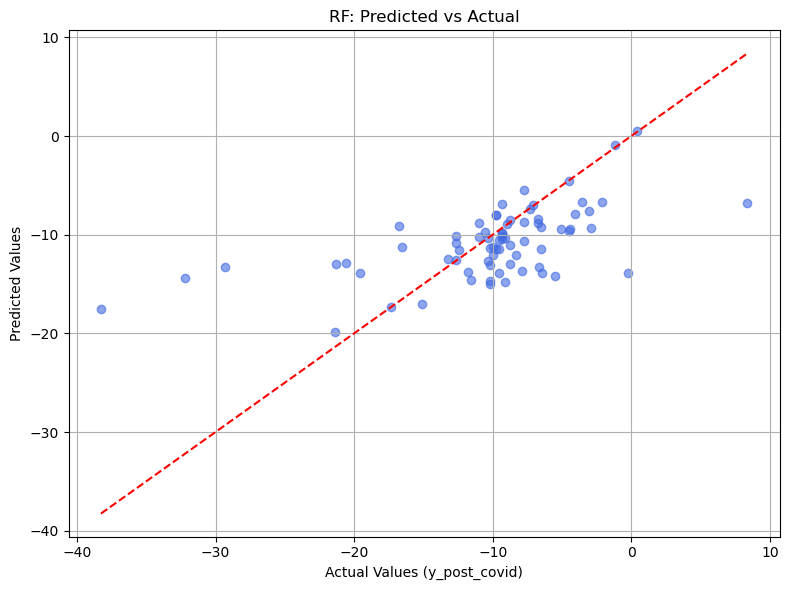

MSE of RF: 31.7455
R squared of RF: 0.3286
RMSE of RF: 5.6343
MAE of RF: 3.7514
MAPE of RF: 1.11%


In [11]:
metrics = my_functions.evaluate_model_performance(model_rf_post_covid, X_test_post_covid, y_test_post_covid, 
                                   model_name="RF", target_name="y_post_covid")

#### Full Time Period

In [12]:
model_rf_full = RandomForestRegressor(criterion='squared_error', verbose=0, **best_params_full)
model_rf_full.fit(X_train_full, y_train_full)

RandomForestRegressor(max_depth=8, random_state=1)

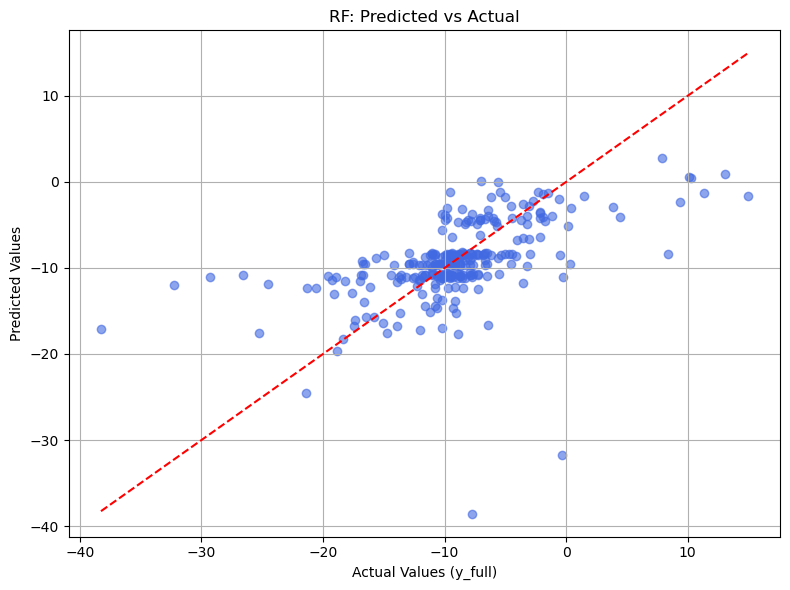

MSE of RF: 29.0826
R squared of RF: 0.2533
RMSE of RF: 5.3928
MAE of RF: 3.4206
MAPE of RF: 1.20%


In [13]:
metrics = my_functions.evaluate_model_performance(model_rf_full, X_test_full, y_test_full, 
                                   model_name="RF", target_name="y_full")

## SHAP Plots

We will fit SHAP plots onto the test set.

#### Covid Time Period

1. Beeswarm plot


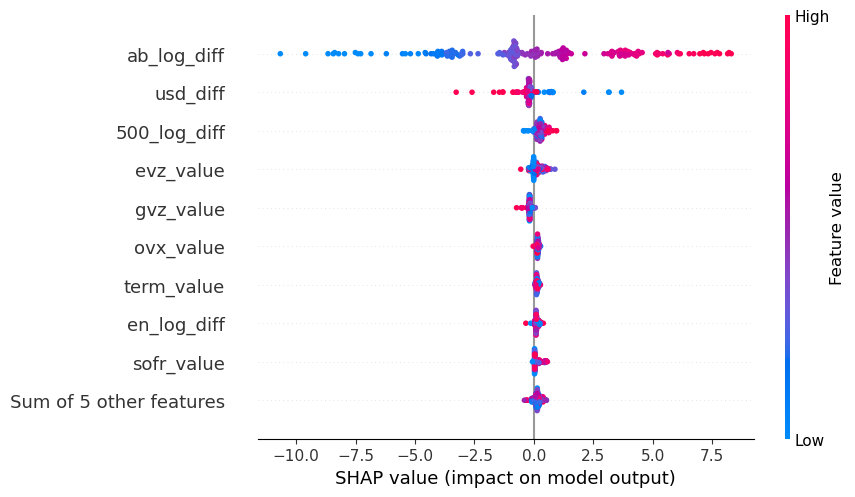

2. Feature importance bar plot


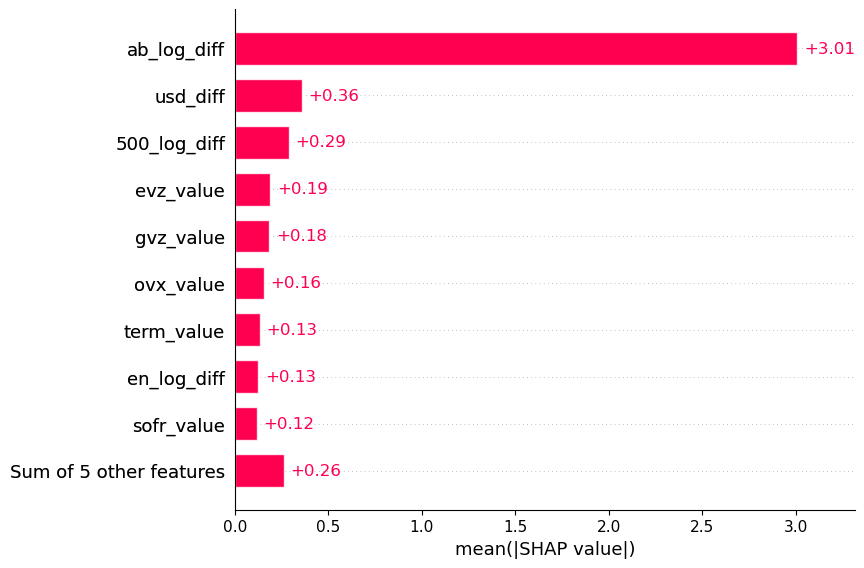

3. Dependence plots grid


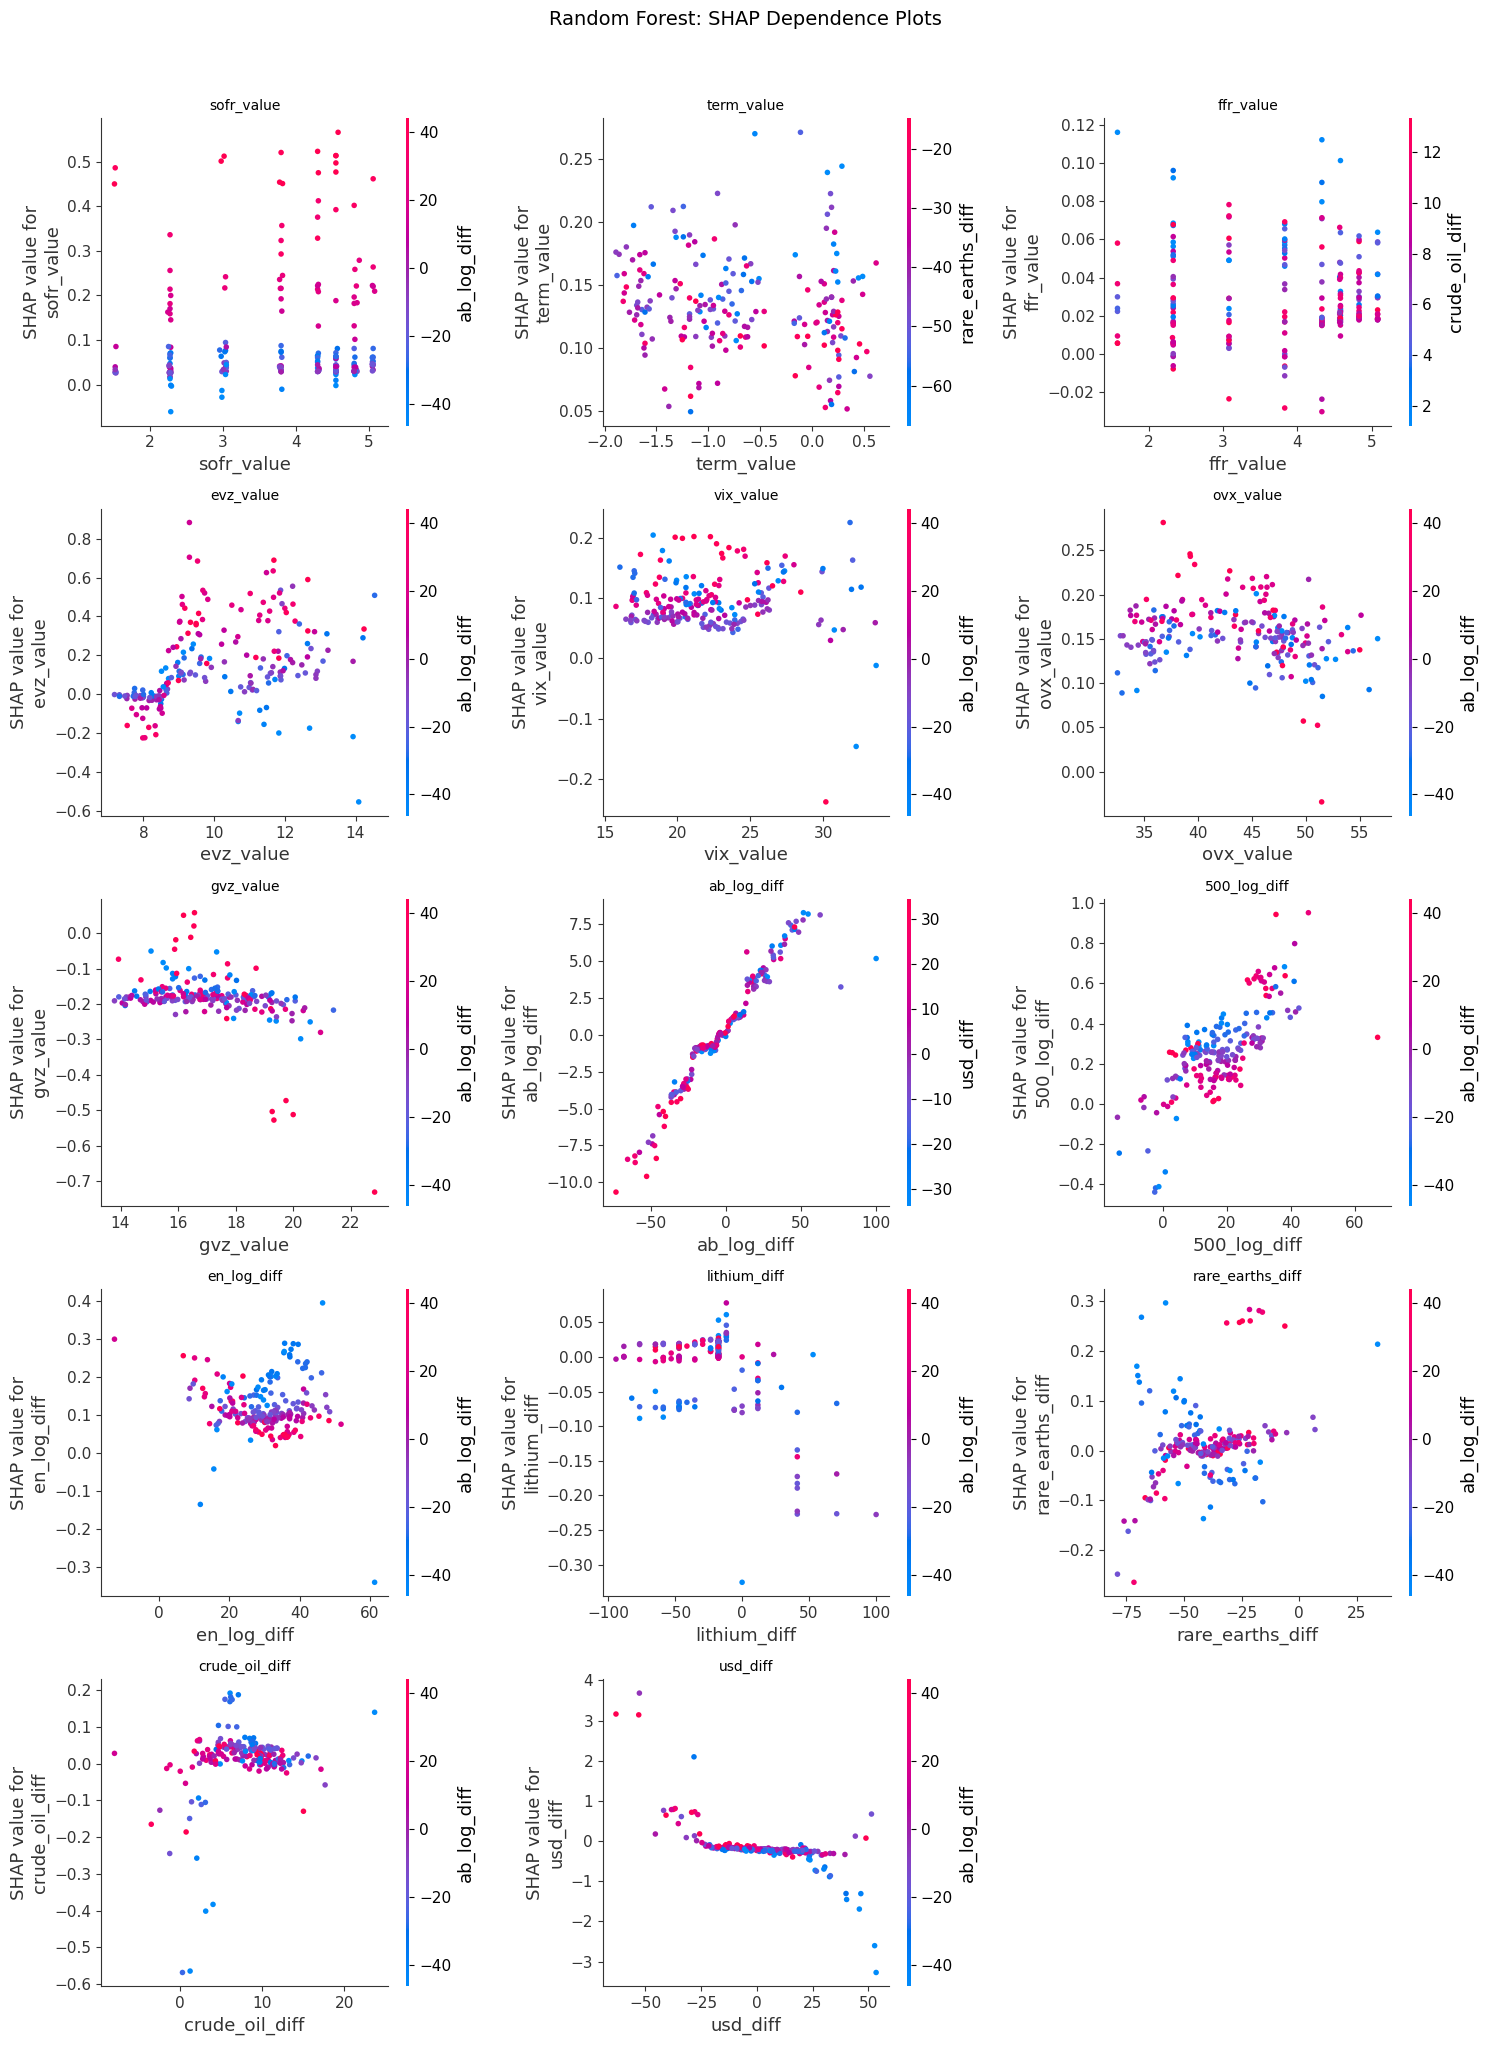

4. Heatmap ordered by predictions


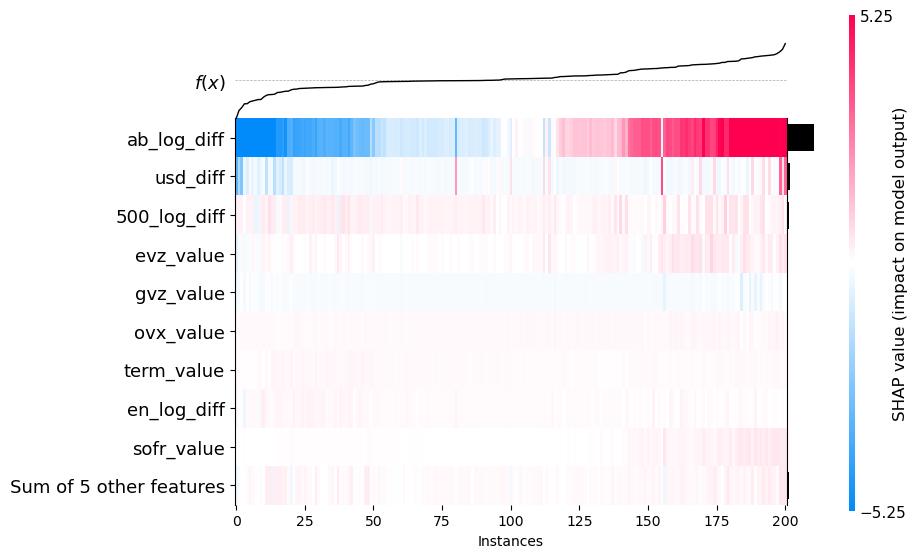

In [14]:
shap_covid = my_functions.shap_analysis_complete(model_rf_covid, X_train_covid, X_test_covid, 
                                model_name="Random Forest", n_cols=3)

#### Post Covid Time Period

1. Beeswarm plot


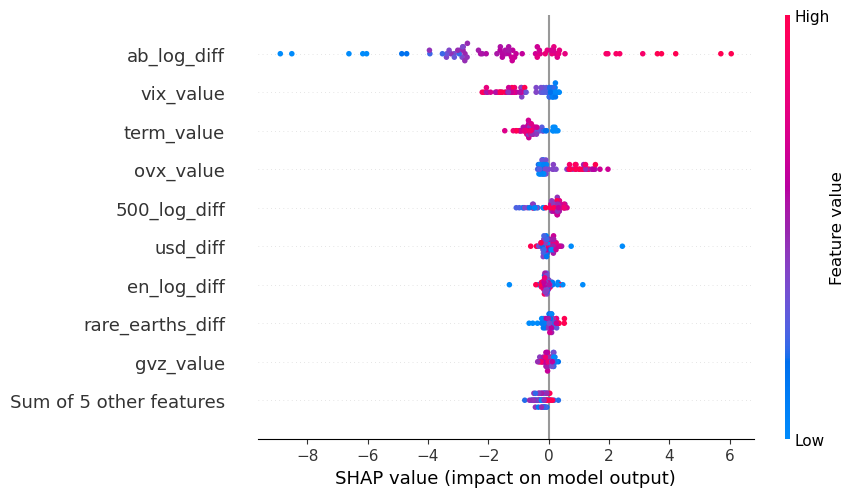

2. Feature importance bar plot


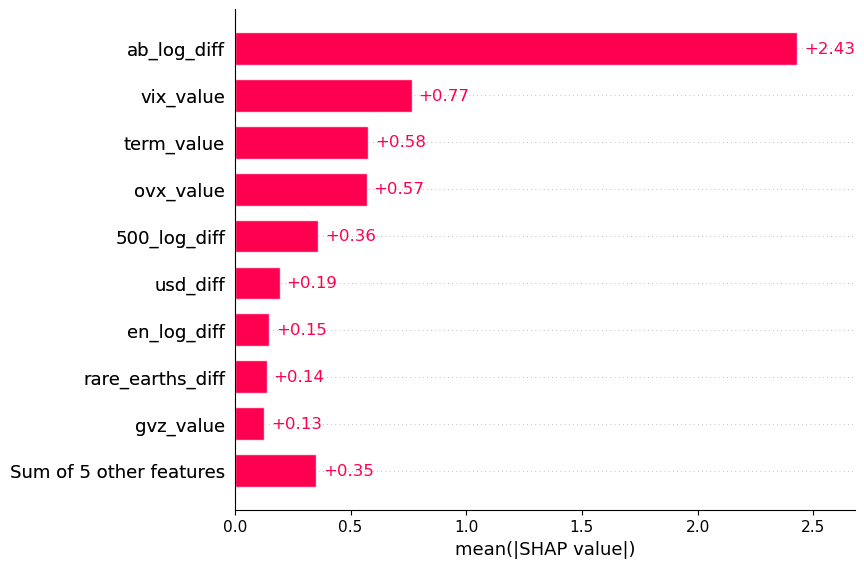

3. Dependence plots grid


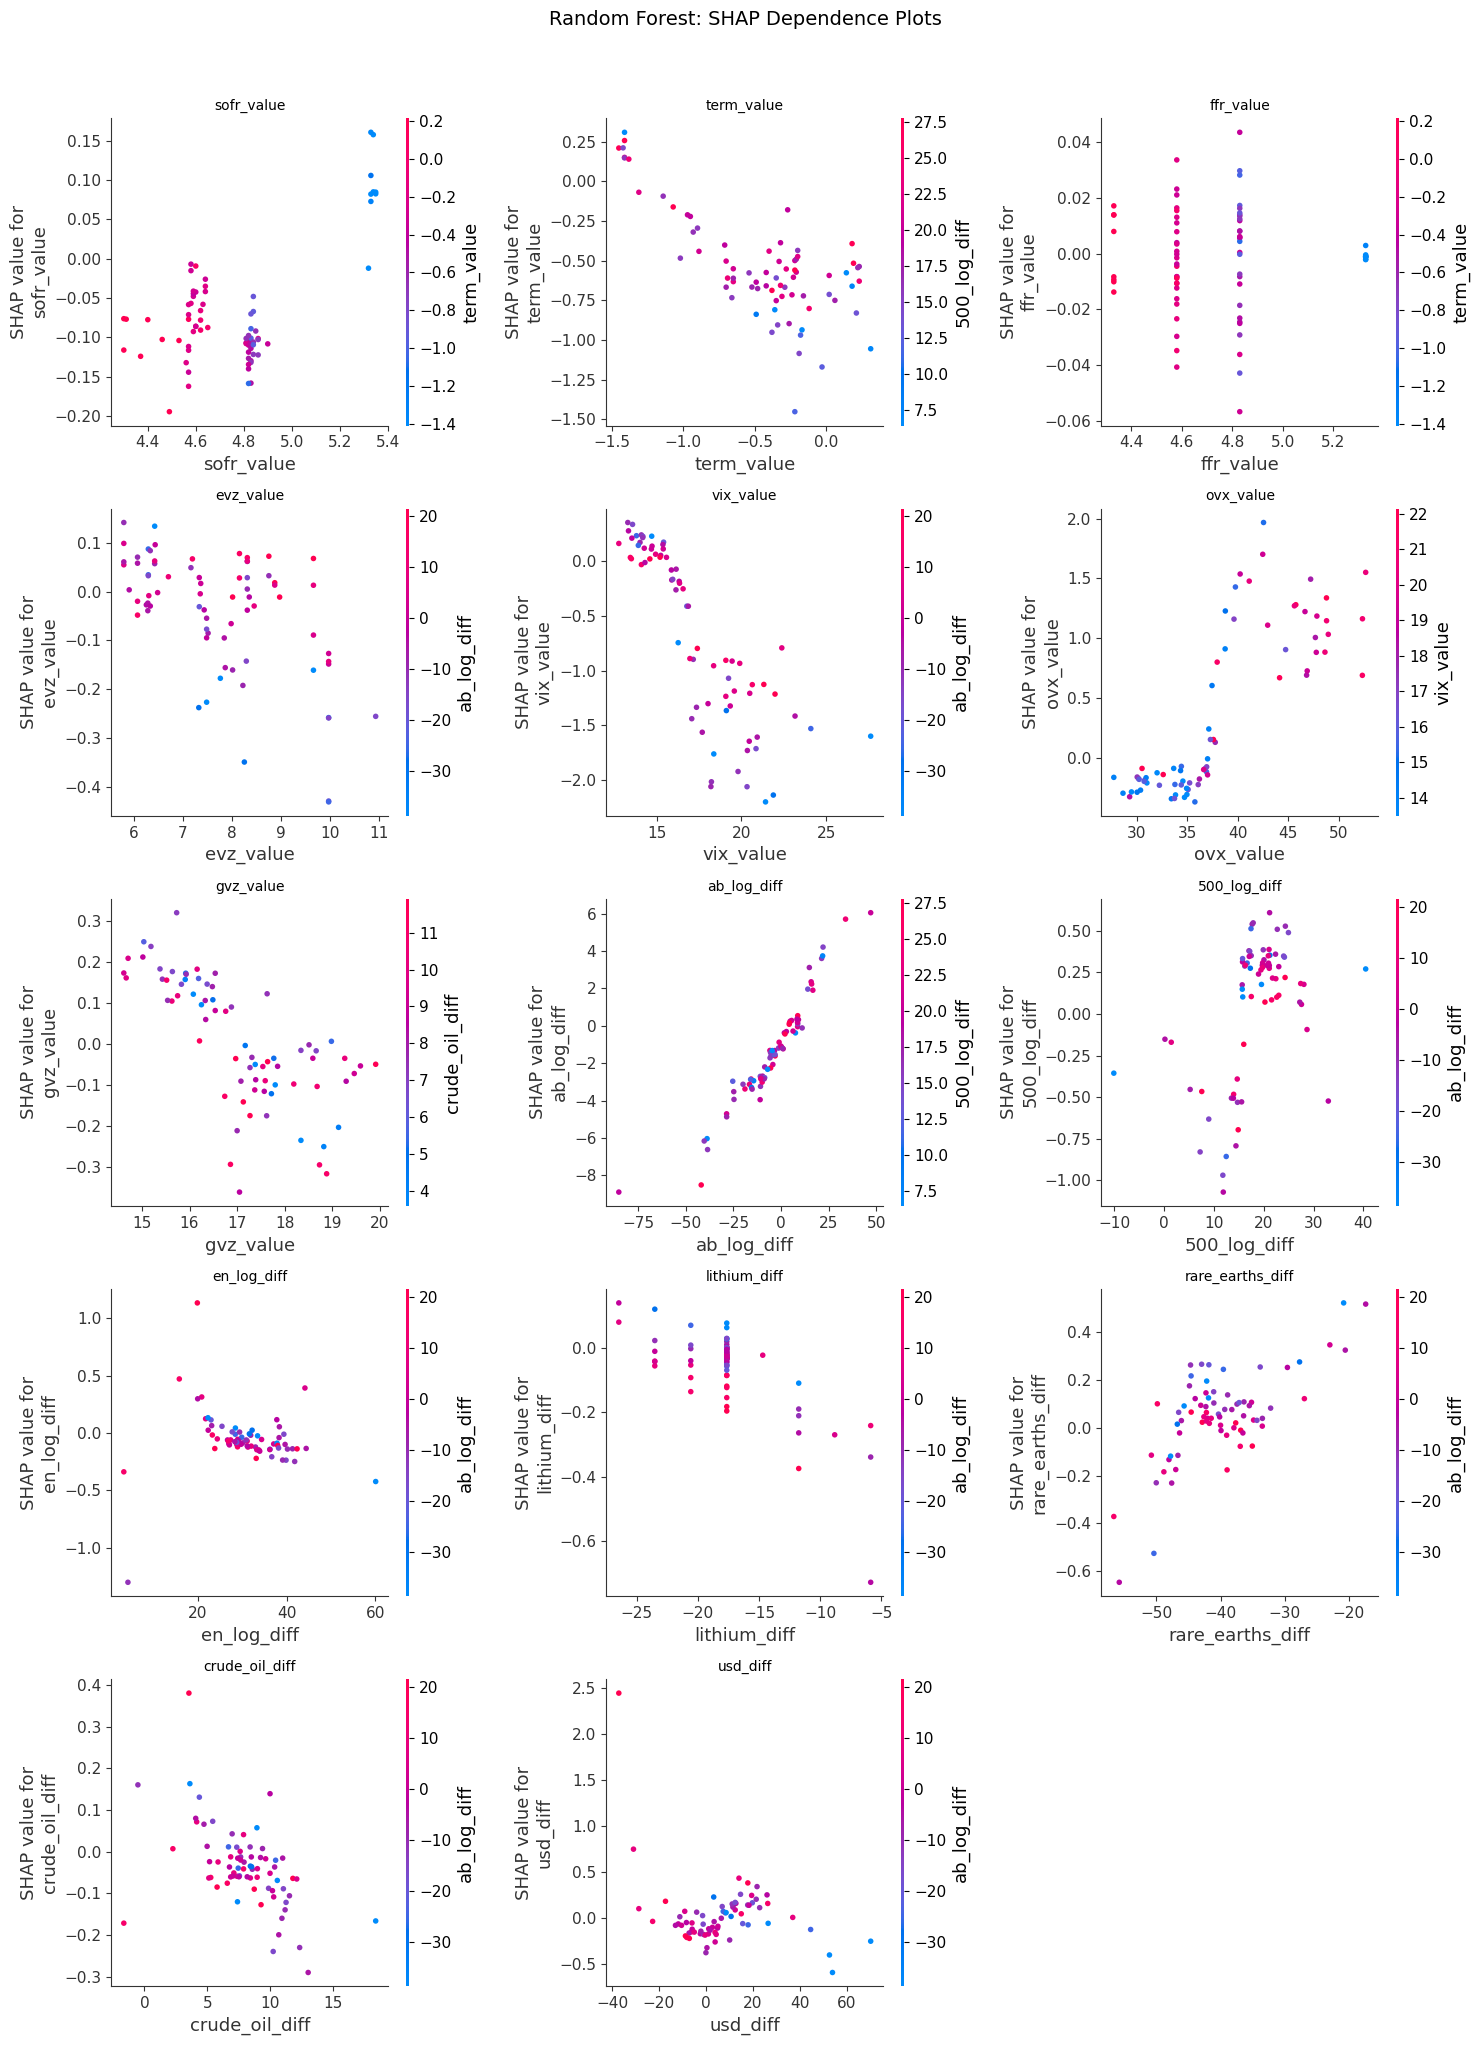

4. Heatmap ordered by predictions


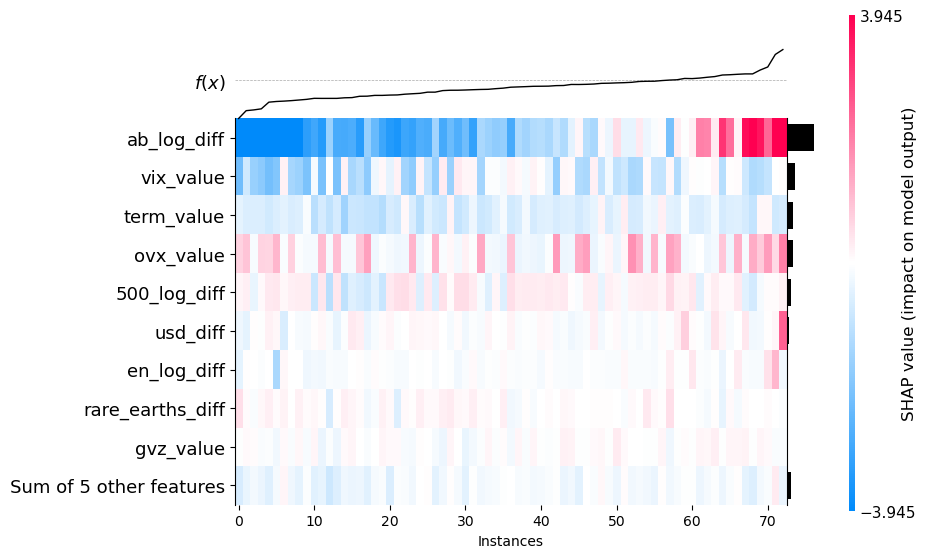

In [15]:
shap_post_covid = my_functions.shap_analysis_complete(model_rf_post_covid, X_train_post_covid, X_test_post_covid, 
                                model_name="Random Forest", n_cols=3)

#### Full Time Period

1. Beeswarm plot


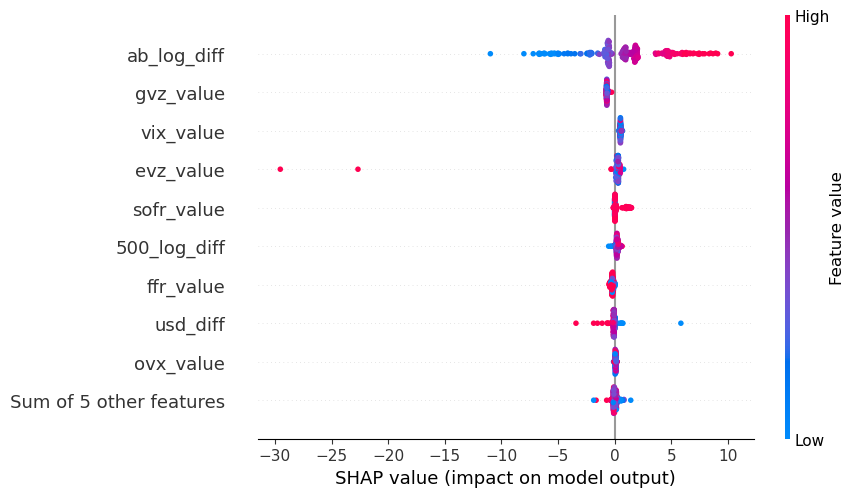

2. Feature importance bar plot


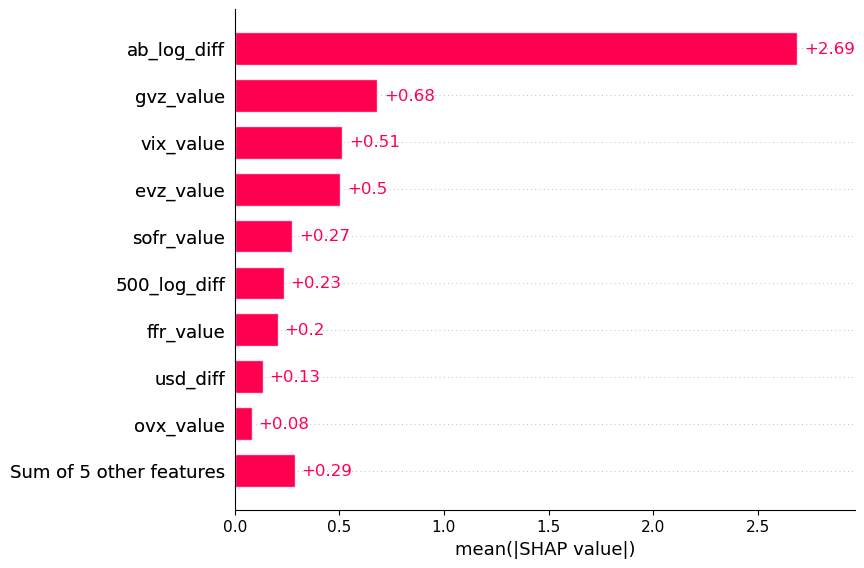

3. Dependence plots grid


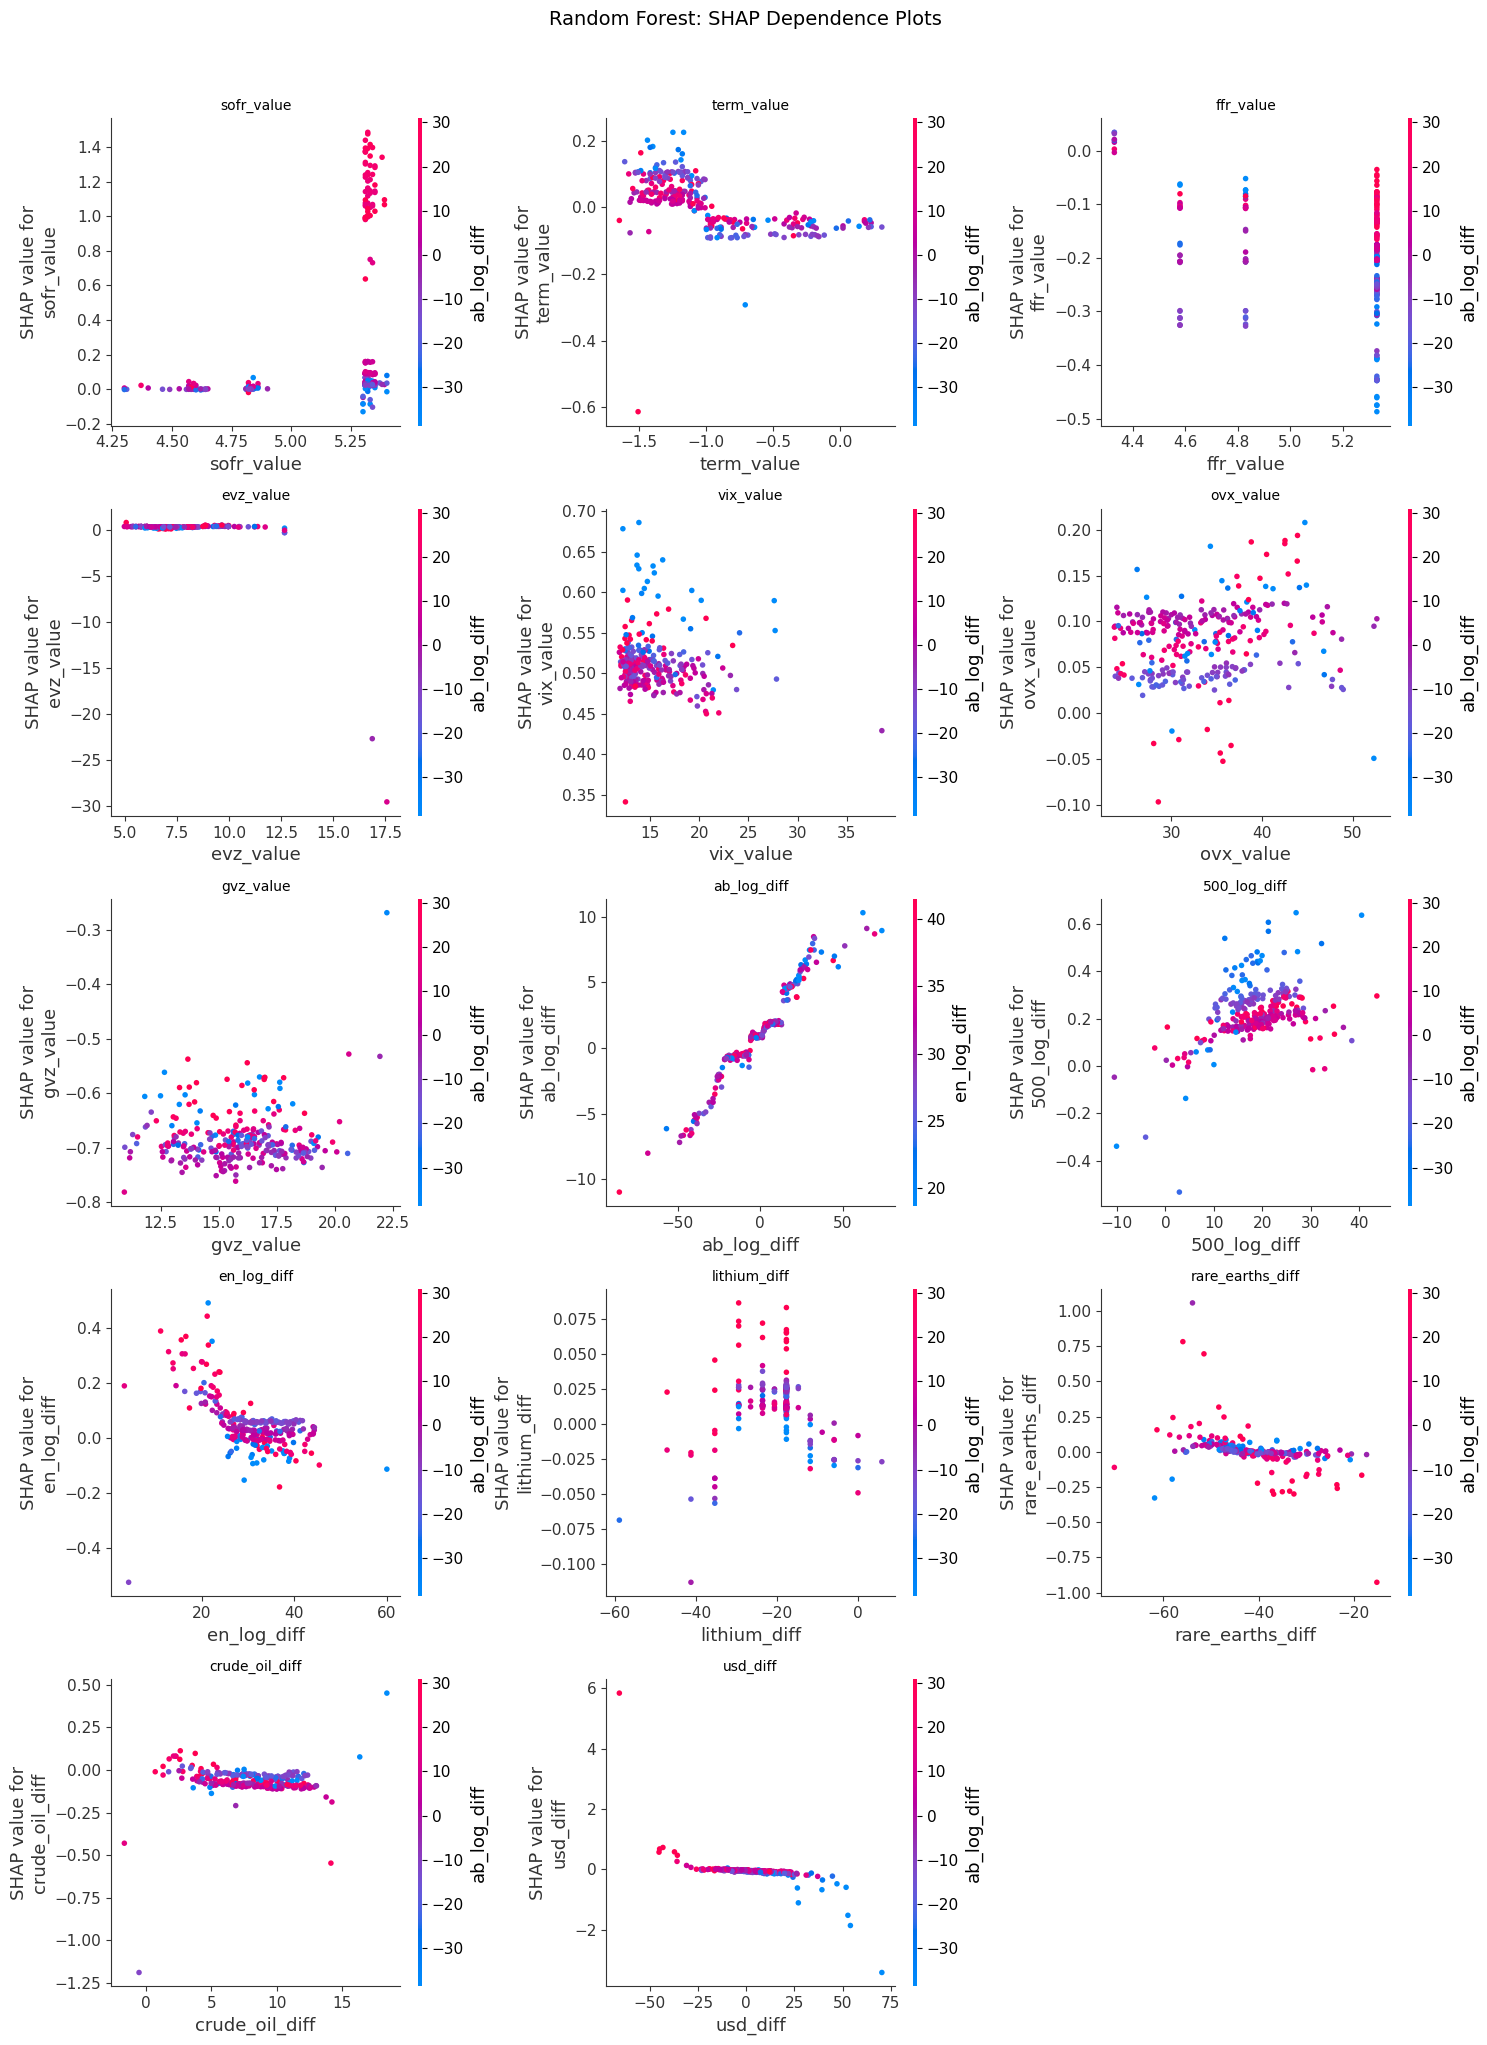

4. Heatmap ordered by predictions


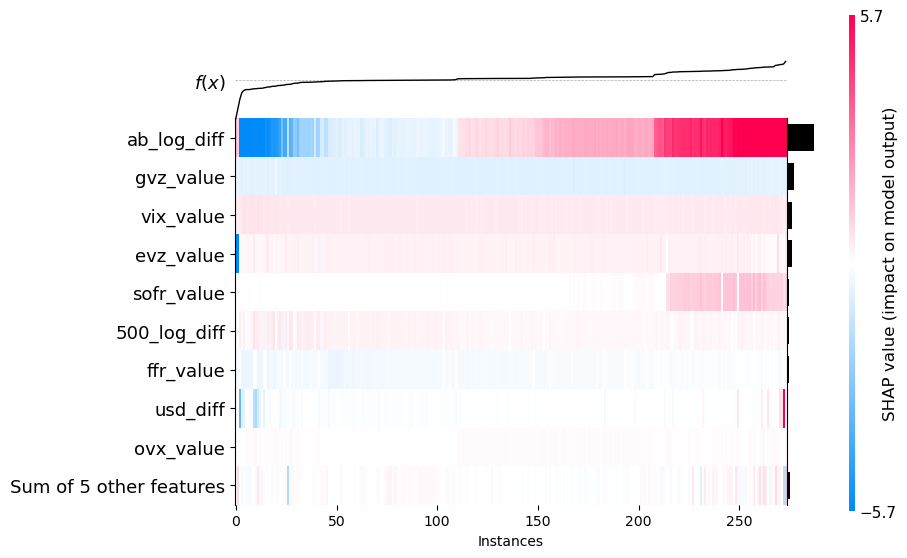

In [16]:
shap_full = my_functions.shap_analysis_complete(model_rf_full, X_train_full, X_test_full, 
                                model_name="Random Forest", n_cols=3)